### 데이터 로드 및 간단한 전처리

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

train = pd.read_csv('data/train.csv')
train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [2]:
date = pd.to_datetime(train.일시)
train['month'] = date.dt.month
train['day'] = date.dt.day
train['time'] = date.dt.hour
train['weekday'] = date.dt.weekday
train['weekend'] = train['weekday'].apply(lambda x: x>=5).astype(int)

train

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),month,day,time,weekday,weekend
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,6,1,0,2,0
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,6,1,1,2,0
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,6,1,2,2,0
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,6,1,3,2,0
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,6,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04,8,24,19,2,0
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96,8,24,20,2,0
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12,8,24,21,2,0
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08,8,24,22,2,0


In [3]:
train['습도(%)'] = train['습도(%)'].interpolate()
train['풍속(m/s)'] = train['풍속(m/s)'].interpolate()
train['강수량(mm)'] = train['강수량(mm)'].fillna(0)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        204000 non-null  float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
 10  month          204000 non-null  int32  
 11  day            204000 non-null  int32  
 12  time           204000 non-null  int32  
 13  weekday        204000 non-null  int32  
 14  weekend        204000 non-null  int32  
dtypes: float64(7), int32(5), int64(1), object(2)
memory usage: 19.5+ MB


In [5]:
train_columns = ['num_date_time','num','datetime','temperature','rainfall','windspeed','humidity','sunlight','radiation','target','month','day','time','weekday','weekend']

In [6]:
train.columns = train_columns
train

,num_date_time,num,datetime,temperature,rainfall,windspeed,humidity,sunlight,radiation,target,month,day,time,weekday,weekend
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,NaN,NaN,1085.28,6,1,0,2,0
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,NaN,NaN,1047.36,6,1,1,2,0
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,NaN,NaN,974.88,6,1,2,2,0
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,NaN,NaN,953.76,6,1,3,2,0
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,NaN,NaN,986.40,6,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,0.0,0.9,86.0,0.5,NaN,881.04,8,24,19,2,0
203996,100_20220824 20,100,20220824 20,22.4,0.0,1.3,86.0,0.0,NaN,798.96,8,24,20,2,0
203997,100_20220824 21,100,20220824 21,21.3,0.0,1.0,92.0,NaN,NaN,825.12,8,24,21,2,0
203998,100_20220824 22,100,20220824 22,21.0,0.0,0.3,94.0,NaN,NaN,640.08,8,24,22,2,0


In [7]:
test = pd.read_csv('data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


In [8]:
test_columns = ['num_date_time','num','datetime','temperature','rainfall','windspeed','humidity']
test.columns = test_columns
test

,num_date_time,num,datetime,temperature,rainfall,windspeed,humidity
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [9]:
test_date = pd.to_datetime(test.datetime)

test['month'] = test_date.dt.month
test['day'] = test_date.dt.day
test['time'] = test_date.dt.hour
test['weekday'] = test_date.dt.weekday
test['weekend'] = test['weekday'].apply(lambda x: x>=5).astype(int)

test

,num_date_time,num,datetime,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72,8,25,0,3,0
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72,8,25,1,3,0
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75,8,25,2,3,0
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78,8,25,3,3,0
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77,8,25,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84,8,31,19,2,0
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95,8,31,20,2,0
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98,8,31,21,2,0
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97,8,31,22,2,0


### 건물별 전기사용량 시각화

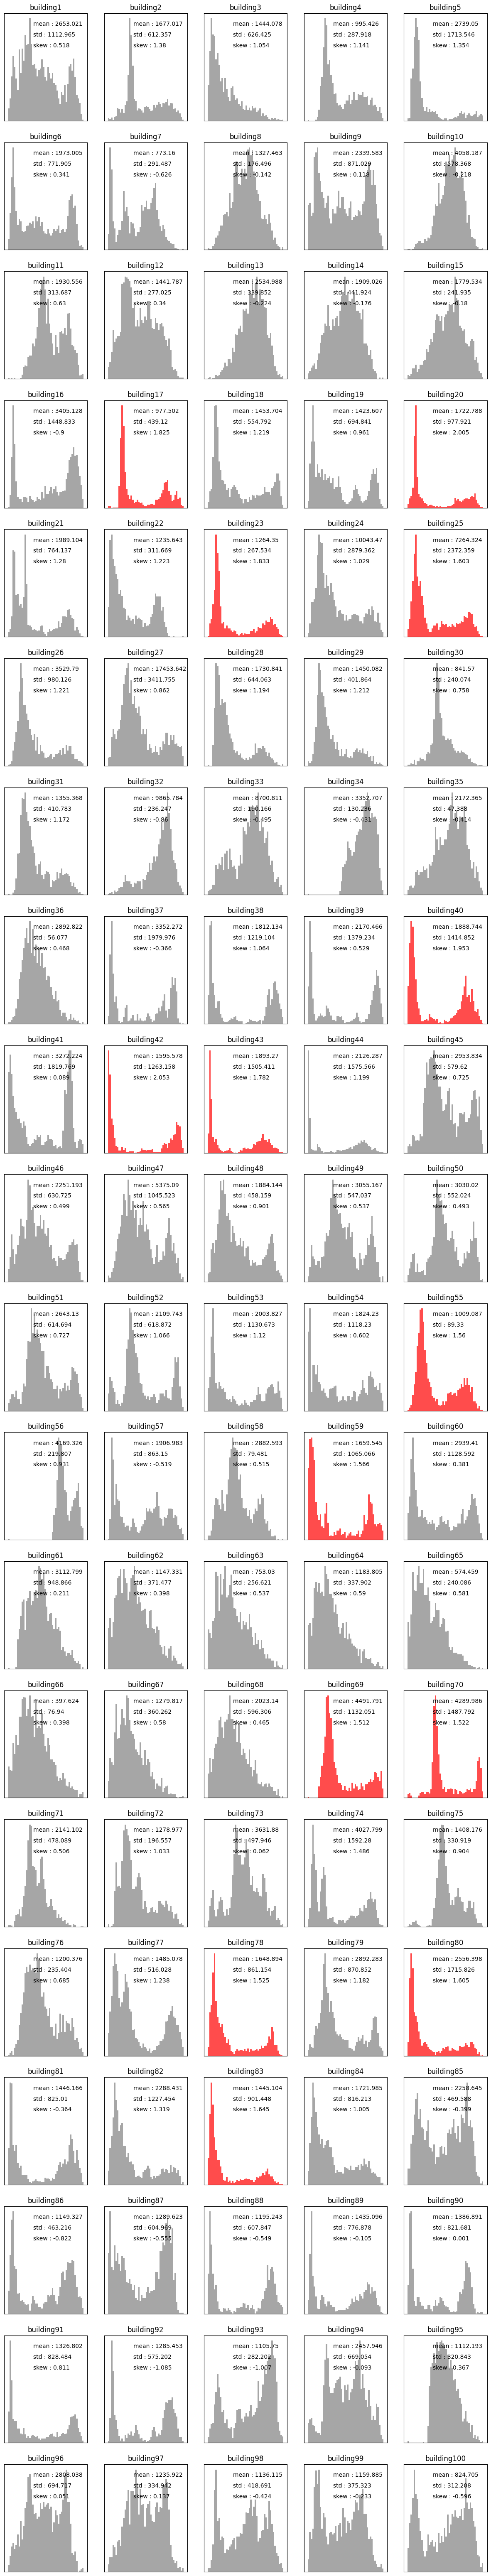

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (15, 80))
for num in range(1,101):
    ax = plt.subplot(20, 5, num)
    energy = train.loc[train.num == num, 'target'].values
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy))/energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    plt.title(f'building{num}')
    plt.xticks([])
    plt.yticks([])
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

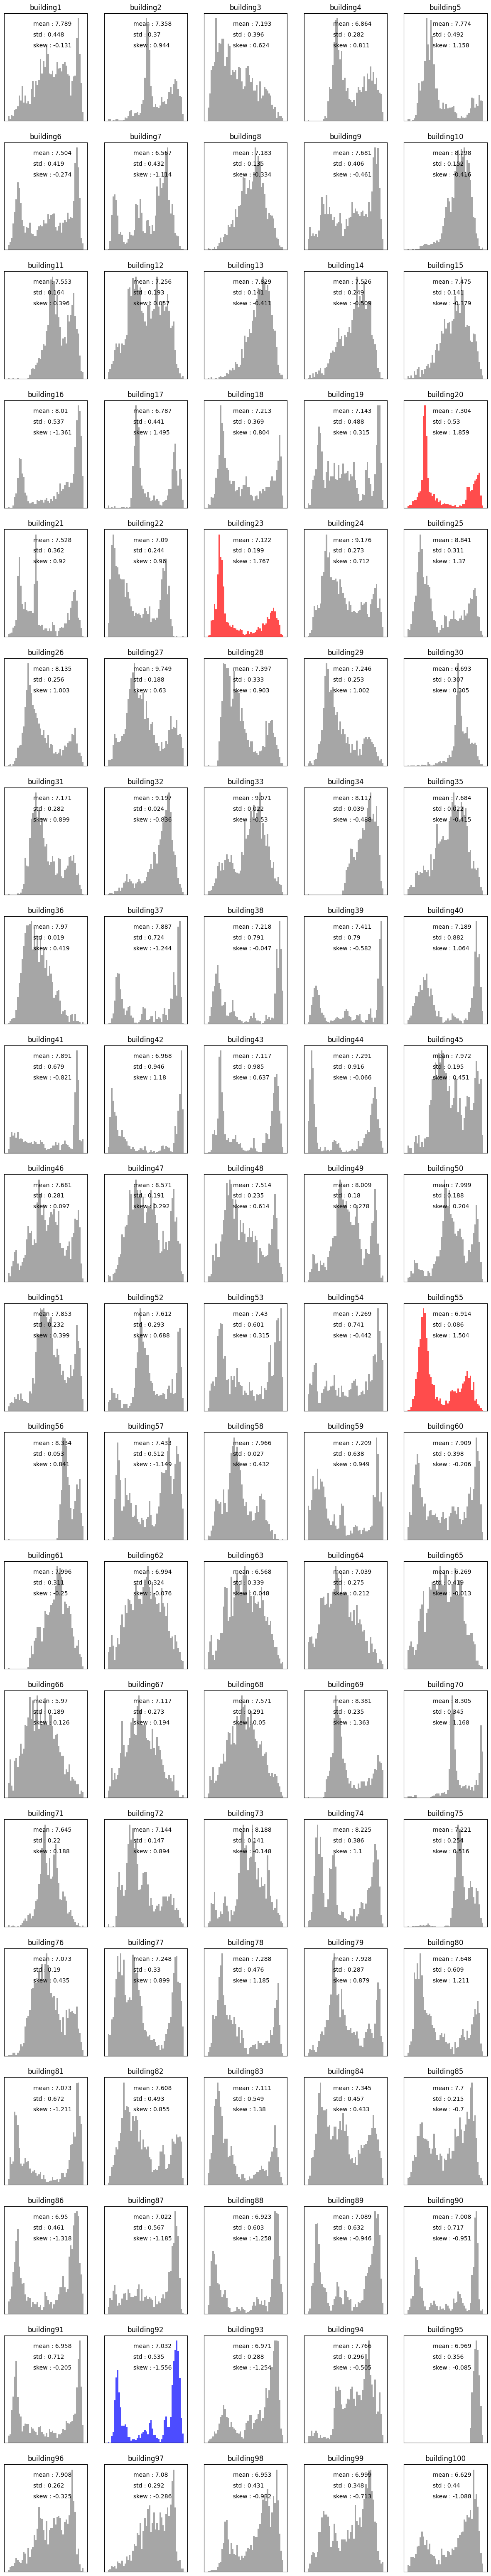

In [11]:
fig = plt.figure(figsize = (15, 80))
for num in range(1,101):
    ax = plt.subplot(20, 5, num)
    energy = np.log(1+train.loc[train.num == num, 'target'].values)
    mean = energy.mean().round(3)
    std = energy.std().round(3)
    skew = (3*(mean - np.median(energy))/energy.std()).round(3)
    if skew >= 1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'red')
    elif skew <= -1.5:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'blue')
    else:
        plt.hist(energy, alpha = 0.7, bins = 50, color = 'gray')
    plt.title(f'building{num}')
    plt.xticks([])
    plt.yticks([])
    plt.text(0.35, 0.9, f'mean : {mean}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.8, f'std : {std}',  ha='left', va='center', transform=ax.transAxes)
    plt.text(0.35, 0.7, f'skew : {skew}',  ha='left', va='center', transform=ax.transAxes)

### 요일, 시간 시각화

In [12]:
df_weekday = train.groupby(['num','weekday'])['target'].median().reset_index().pivot(index='num',columns = 'weekday',values ='target').reset_index()
df_weekday

weekday,num,0,1,2,3,4,5,6
0,1,2388.48,2585.52,2455.92,2484.000,2599.68,2506.08,2116.80
1,2,1219.32,1755.90,1546.38,1723.680,1517.22,1644.66,1465.02
2,3,1119.60,1290.78,1236.42,1302.120,1318.32,1271.16,1255.68
3,4,902.07,910.26,884.52,889.290,880.92,875.34,873.63
4,5,1789.20,1822.32,1941.84,2030.760,2472.12,2739.96,2277.72
...,...,...,...,...,...,...,...,...
95,96,2761.92,2707.74,2728.68,2775.000,2797.68,2928.72,2868.66
96,97,1160.19,1193.49,1160.46,1221.660,1244.07,1312.56,1268.55
97,98,1170.99,1179.72,1173.15,1213.965,1249.02,1238.67,1153.62
98,99,1189.62,1144.17,1143.09,1118.970,1196.82,1222.74,1234.53


In [13]:
df_hour = train.groupby(['num','time'])['target'].median().reset_index().pivot(index='num',columns = 'time',values ='target').reset_index().drop('num', axis = 1)
df_hour

time,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1770.24,1714.56,1602.72,1510.56,1508.16,1670.88,1819.20,2265.60,2767.68,3196.80,...,4336.32,4216.32,4140.96,3607.68,2894.40,2733.60,2504.64,1986.72,1459.68,1867.68
1,1239.84,1229.04,1222.20,1205.64,1199.88,1193.04,1243.44,1106.64,1732.32,1993.32,...,2382.84,2415.24,2453.76,2292.84,2354.40,2039.40,1829.16,1514.88,831.24,1289.16
2,959.76,908.64,885.24,865.08,843.84,864.36,903.60,1012.32,1121.40,1269.72,...,1692.36,1871.28,1963.08,2055.24,2524.68,2616.12,2462.04,1949.04,1150.56,1018.80
3,717.66,709.20,715.86,713.52,711.90,718.56,776.16,879.12,1093.32,1266.30,...,1332.54,1323.18,1299.06,1187.82,1026.36,870.48,820.80,782.10,764.28,721.08
4,1839.60,1825.20,1793.52,1789.20,1782.72,1866.96,1910.16,2172.96,2607.84,2914.56,...,3434.40,3309.84,2921.76,2541.60,2094.48,1846.08,1781.28,1724.40,1674.72,1658.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2122.56,2097.24,2052.00,2046.12,2040.96,2107.32,2279.28,2585.64,2919.96,3258.84,...,3588.36,3624.84,3536.16,3554.76,3444.24,3323.04,3086.16,3001.92,2538.60,2323.80
96,898.56,850.50,824.40,796.68,840.42,995.22,1024.02,1080.00,1221.84,1346.76,...,1629.18,1603.08,1596.60,1587.78,1549.62,1520.10,1490.40,1345.86,1164.42,1002.96
97,530.46,501.30,484.38,478.08,655.74,858.60,999.00,1103.58,1197.90,1311.66,...,1587.78,1553.40,1593.54,1625.76,1490.94,1383.12,1291.68,1130.04,855.72,663.66
98,750.42,694.62,660.60,647.64,650.34,694.26,833.04,982.44,1204.74,1517.94,...,1523.52,1572.30,1615.68,1627.38,1530.00,1416.06,1388.16,1239.48,1006.56,855.54


In [14]:
df_time = pd.concat([df_weekday, df_hour], axis = 1)
df_time

,num,0,1,2,3,4,5,6,0,1,...,14,15,16,17,18,19,20,21,22,23
0,1,2388.48,2585.52,2455.92,2484.000,2599.68,2506.08,2116.80,1770.24,1714.56,...,4336.32,4216.32,4140.96,3607.68,2894.40,2733.60,2504.64,1986.72,1459.68,1867.68
1,2,1219.32,1755.90,1546.38,1723.680,1517.22,1644.66,1465.02,1239.84,1229.04,...,2382.84,2415.24,2453.76,2292.84,2354.40,2039.40,1829.16,1514.88,831.24,1289.16
2,3,1119.60,1290.78,1236.42,1302.120,1318.32,1271.16,1255.68,959.76,908.64,...,1692.36,1871.28,1963.08,2055.24,2524.68,2616.12,2462.04,1949.04,1150.56,1018.80
3,4,902.07,910.26,884.52,889.290,880.92,875.34,873.63,717.66,709.20,...,1332.54,1323.18,1299.06,1187.82,1026.36,870.48,820.80,782.10,764.28,721.08
4,5,1789.20,1822.32,1941.84,2030.760,2472.12,2739.96,2277.72,1839.60,1825.20,...,3434.40,3309.84,2921.76,2541.60,2094.48,1846.08,1781.28,1724.40,1674.72,1658.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2761.92,2707.74,2728.68,2775.000,2797.68,2928.72,2868.66,2122.56,2097.24,...,3588.36,3624.84,3536.16,3554.76,3444.24,3323.04,3086.16,3001.92,2538.60,2323.80
96,97,1160.19,1193.49,1160.46,1221.660,1244.07,1312.56,1268.55,898.56,850.50,...,1629.18,1603.08,1596.60,1587.78,1549.62,1520.10,1490.40,1345.86,1164.42,1002.96
97,98,1170.99,1179.72,1173.15,1213.965,1249.02,1238.67,1153.62,530.46,501.30,...,1587.78,1553.40,1593.54,1625.76,1490.94,1383.12,1291.68,1130.04,855.72,663.66
98,99,1189.62,1144.17,1143.09,1118.970,1196.82,1222.74,1234.53,750.42,694.62,...,1523.52,1572.30,1615.68,1627.38,1530.00,1416.06,1388.16,1239.48,1006.56,855.54


In [15]:
time_columns = ['num'] + ['day' + str(i) for i in range(7)] + ['hour'+ str(i) for i in range(24)]
df_time.columns = time_columns

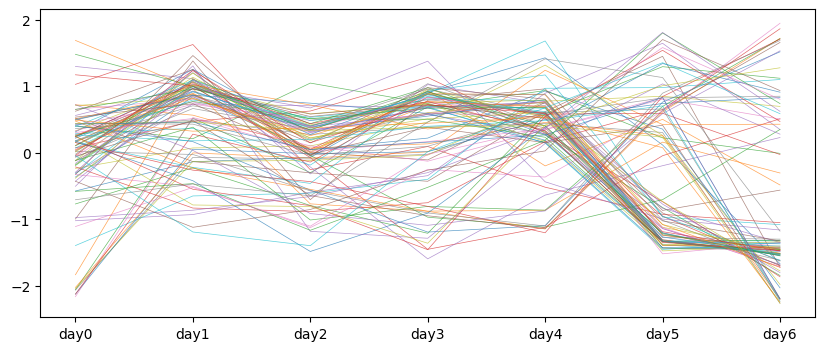

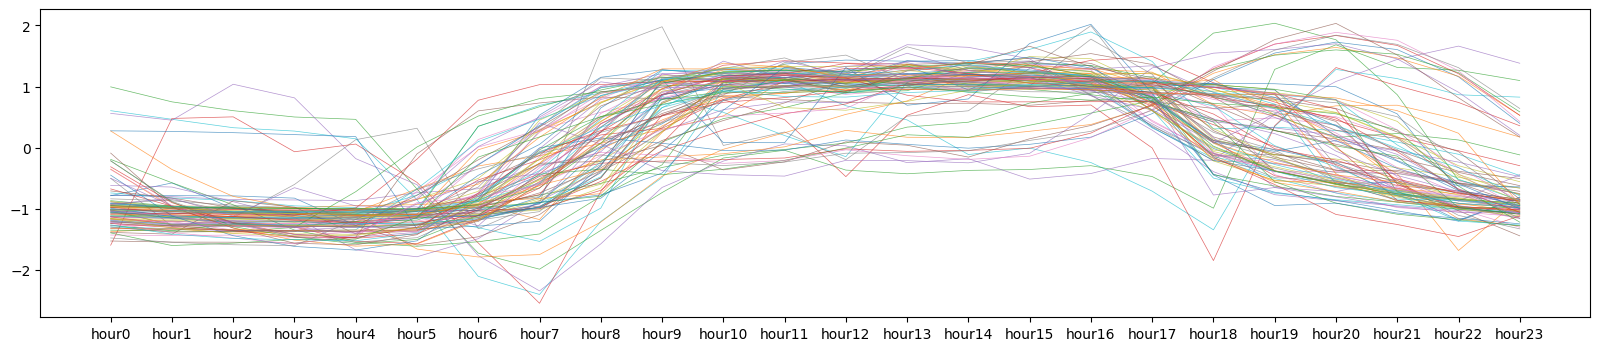

In [16]:
import matplotlib.pyplot as plt

for i in range(len(df_time)):
    df_time.iloc[i,1:8] = (df_time.iloc[i,1:8] - df_time.iloc[i,1:8].mean()) / df_time.iloc[i,1:8].std()
    df_time.iloc[i,8:] = (df_time.iloc[i,8:] - df_time.iloc[i,8:].mean()) / df_time.iloc[i,8:].std()

fig = plt.figure(figsize = (10,4))

for i in range(len(df_time)):
    plt.plot(df_time.iloc[i,1:8], alpha = 0.7, linewidth = 0.5)

fig = plt.figure(figsize = (20,4))

for i in range(len(df_time)):
    plt.plot(df_time.iloc[i,8:], alpha = 0.7, linewidth = 0.5)

### 건물별 군집화

c:\Users\이동현\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\이동현\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\이동현\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\이동현\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kme

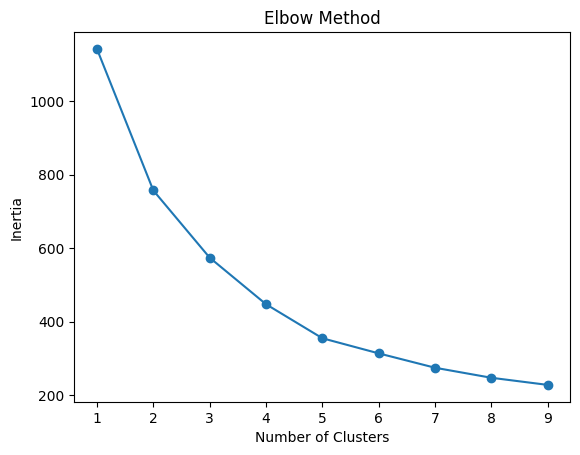

In [17]:
from sklearn.cluster import KMeans

inertia_values = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_time.iloc[:,1:])
    inertia_values.append(kmeans.inertia_)
    
# Scree plot 그리기
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans_cluster = kmeans.fit_predict(df_time.iloc[:,1:])

df_cluster = df_time.copy()
df_cluster['kmeans'] = kmeans_cluster
df_cluster

c:\Users\이동현\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,num,day0,day1,day2,day3,day4,day5,day6,hour0,hour1,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,kmeans
0,1,-0.365033,0.842013,0.048097,0.220112,0.928756,0.355372,-2.029317,-0.903789,-0.954297,...,1.315072,1.246712,0.762969,0.115947,-0.029916,-0.237608,-0.707418,-1.185501,-0.815400,1
1,2,-1.832654,1.112889,-0.037266,0.936019,-0.197339,0.502240,-0.483890,-0.930175,-0.949983,...,1.225588,1.296236,1.001098,1.114004,0.536272,0.150678,-0.425733,-1.679575,-0.839719,2
2,3,-2.059300,0.519474,-0.299443,0.690307,0.934355,0.223904,-0.009297,-0.865560,-0.955021,...,0.729634,0.890288,1.051571,1.873108,2.033132,1.763486,0.865717,-0.531652,-0.762237,2
3,4,1.027605,1.625945,-0.254553,0.093931,-0.517560,-0.925220,-1.050148,-1.006087,-1.036407,...,1.164029,1.077586,0.678914,0.100259,-0.458397,-0.636445,-0.775141,-0.839006,-0.993830,1
4,5,-1.021251,-0.928384,-0.593254,-0.343926,0.893631,1.644644,0.348541,-0.777633,-0.799466,...,1.451557,0.863147,0.286745,-0.391182,-0.767808,-0.866058,-0.952300,-1.027625,-1.051642,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,-0.428483,-1.120118,-0.852808,-0.261510,0.028011,1.700802,0.934106,-1.238255,-1.278298,...,1.137517,0.997275,1.026690,0.851908,0.660237,0.285625,0.152404,-0.580311,-0.920005,2
96,97,-1.108302,-0.520686,-1.103538,-0.023595,0.371854,1.580437,0.803831,-1.225923,-1.388949,...,1.163898,1.141917,1.111998,0.982555,0.882419,0.781673,0.291375,-0.324092,-0.871785,2
97,98,-0.705989,-0.469207,-0.647404,0.459617,1.410409,1.129687,-1.177114,-1.474814,-1.545078,...,0.990053,1.086774,1.164411,0.839550,0.579748,0.359415,-0.030072,-0.691071,-1.153857,2
98,99,0.252212,-0.784497,-0.809131,-1.359305,0.416443,1.007675,1.276603,-1.159134,-1.310561,...,1.071249,1.188971,1.220722,0.956457,0.647251,0.571537,0.168056,-0.464032,-0.873863,2


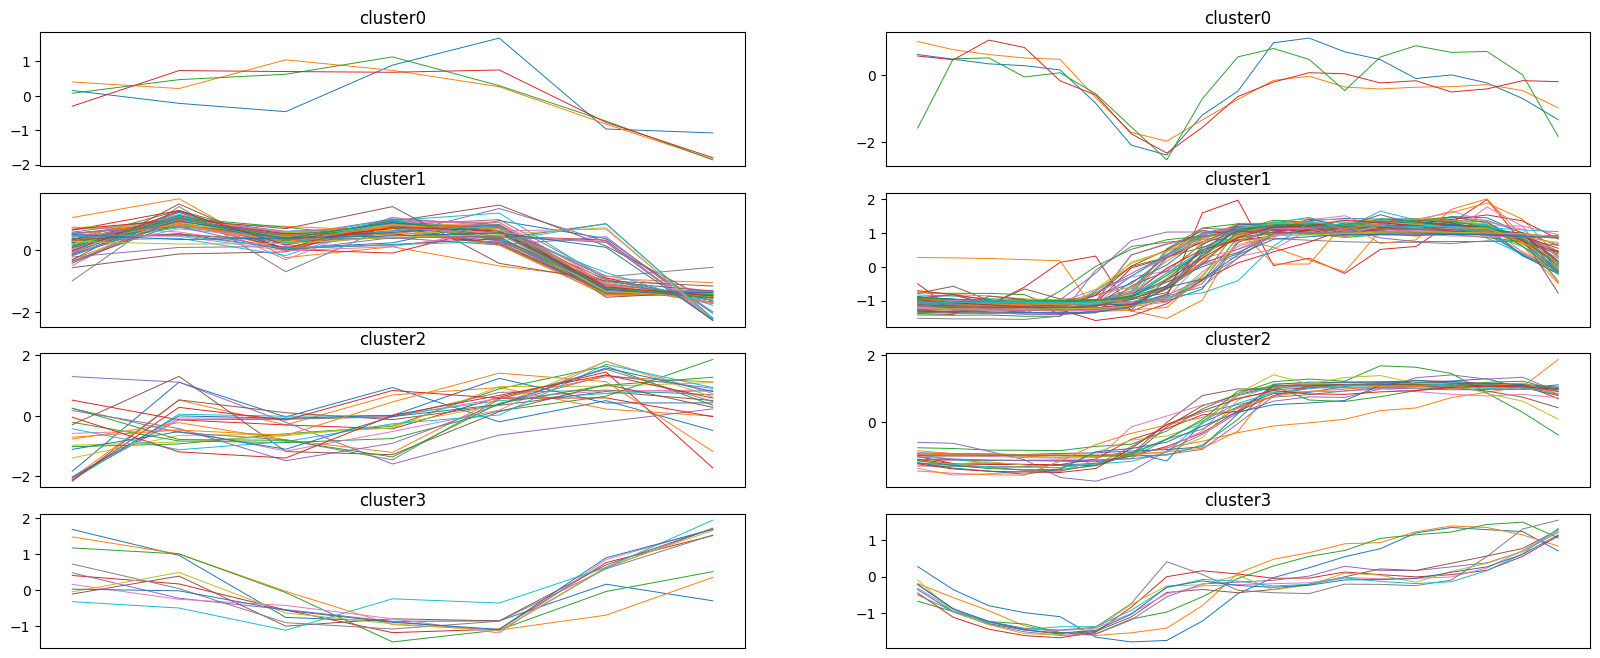

In [19]:
k_len = len(np.unique(df_cluster.kmeans))

fig = plt.figure(figsize = (20,8))
for c in range(k_len):
    temp = df_cluster[df_cluster.kmeans == c]
    plt.subplot(k_len,2,2*c+1)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,1:8], linewidth=0.7, )
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])
    plt.subplot(k_len,2,2*c+2)
    for i in range(len(temp)):
        plt.plot(temp.iloc[i,8:-6], linewidth=0.7)
        plt.title(f'cluster{c}')
        plt.xlabel('')
        plt.xticks([])

In [20]:
train = train.merge(df_cluster[['num','kmeans']], on = 'num', how = 'left')
train

,num_date_time,num,datetime,temperature,rainfall,windspeed,humidity,sunlight,radiation,target,month,day,time,weekday,weekend,kmeans
0,1_20220601 00,1,20220601 00,18.6,0.0,0.9,42.0,NaN,NaN,1085.28,6,1,0,2,0,1
1,1_20220601 01,1,20220601 01,18.0,0.0,1.1,45.0,NaN,NaN,1047.36,6,1,1,2,0,1
2,1_20220601 02,1,20220601 02,17.7,0.0,1.5,45.0,NaN,NaN,974.88,6,1,2,2,0,1
3,1_20220601 03,1,20220601 03,16.7,0.0,1.4,48.0,NaN,NaN,953.76,6,1,3,2,0,1
4,1_20220601 04,1,20220601 04,18.4,0.0,2.8,43.0,NaN,NaN,986.40,6,1,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,0.0,0.9,86.0,0.5,NaN,881.04,8,24,19,2,0,2
203996,100_20220824 20,100,20220824 20,22.4,0.0,1.3,86.0,0.0,NaN,798.96,8,24,20,2,0,2
203997,100_20220824 21,100,20220824 21,21.3,0.0,1.0,92.0,NaN,NaN,825.12,8,24,21,2,0,2
203998,100_20220824 22,100,20220824 22,21.0,0.0,0.3,94.0,NaN,NaN,640.08,8,24,22,2,0,2


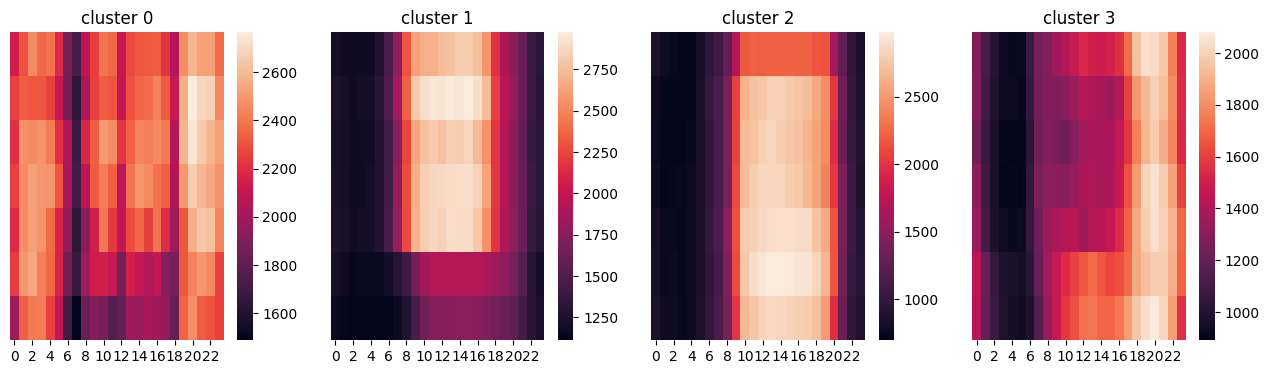

In [21]:
fig = plt.figure(figsize = (20, 4))
for c in range(4):
    temp = train[train.kmeans == c]
    temp = temp.groupby(['weekday', 'time'])['target'].median().reset_index().pivot(index = 'weekday', columns = 'time', values = 'target')
    plt.subplot(1, 5, c+1)
    sns.heatmap(temp)
    plt.title(f'cluster {c}')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

### 건물정보

In [22]:
build = pd.read_csv('data/building_info.csv')

from sklearn.preprocessing import LabelEncoder

build['냉방 비율'] = build['냉방면적(m2)']/build['연면적(m2)']
build['태양광용량(kW)'] = build['태양광용량(kW)'].replace("-",0)
build['ESS저장용량(kWh)'] = build['ESS저장용량(kWh)'].replace("-",0)
build['PCS용량(kW)'] = build['PCS용량(kW)'].replace("-",0)

build = build.astype({'태양광용량(kW)':float, 'ESS저장용량(kWh)':float,'PCS용량(kW)':float})

le = LabelEncoder()
le.fit(build['건물유형'])
build['건물유형'] = le.transform(build['건물유형'])
build = build.drop(['연면적(m2)','냉방면적(m2)','ESS저장용량(kWh)',	'PCS용량(kW)'], axis=1)
build_columns = ['num','type','solar_capacity','cold_ratio']
build.columns = build_columns

### 일단 진행

In [23]:
train_df = pd.merge(train, build, on = 'num', how = 'left')
train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df.set_index('datetime', inplace= True)
train_df = train_df.drop(['num_date_time','sunlight','radiation'], axis = 1)
train_df

,num,temperature,rainfall,windspeed,humidity,target,month,day,time,weekday,weekend,kmeans,type,solar_capacity,cold_ratio
datetime,,,,,,,,,,,,,,,
2022-06-01 00:00:00,1,18.6,0.0,0.9,42.0,1085.28,6,1,0,2,0,1,0,0.0,0.357666
2022-06-01 01:00:00,1,18.0,0.0,1.1,45.0,1047.36,6,1,1,2,0,1,0,0.0,0.357666
2022-06-01 02:00:00,1,17.7,0.0,1.5,45.0,974.88,6,1,2,2,0,1,0,0.0,0.357666
2022-06-01 03:00:00,1,16.7,0.0,1.4,48.0,953.76,6,1,3,2,0,1,0,0.0,0.357666
2022-06-01 04:00:00,1,18.4,0.0,2.8,43.0,986.40,6,1,4,2,0,1,0,0.0,0.357666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24 19:00:00,100,23.1,0.0,0.9,86.0,881.04,8,24,19,2,0,2,11,0.0,0.696291
2022-08-24 20:00:00,100,22.4,0.0,1.3,86.0,798.96,8,24,20,2,0,2,11,0.0,0.696291
2022-08-24 21:00:00,100,21.3,0.0,1.0,92.0,825.12,8,24,21,2,0,2,11,0.0,0.696291


C:\Users\이동현\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\이동현\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\이동현\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\이동현\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\이동현\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missin

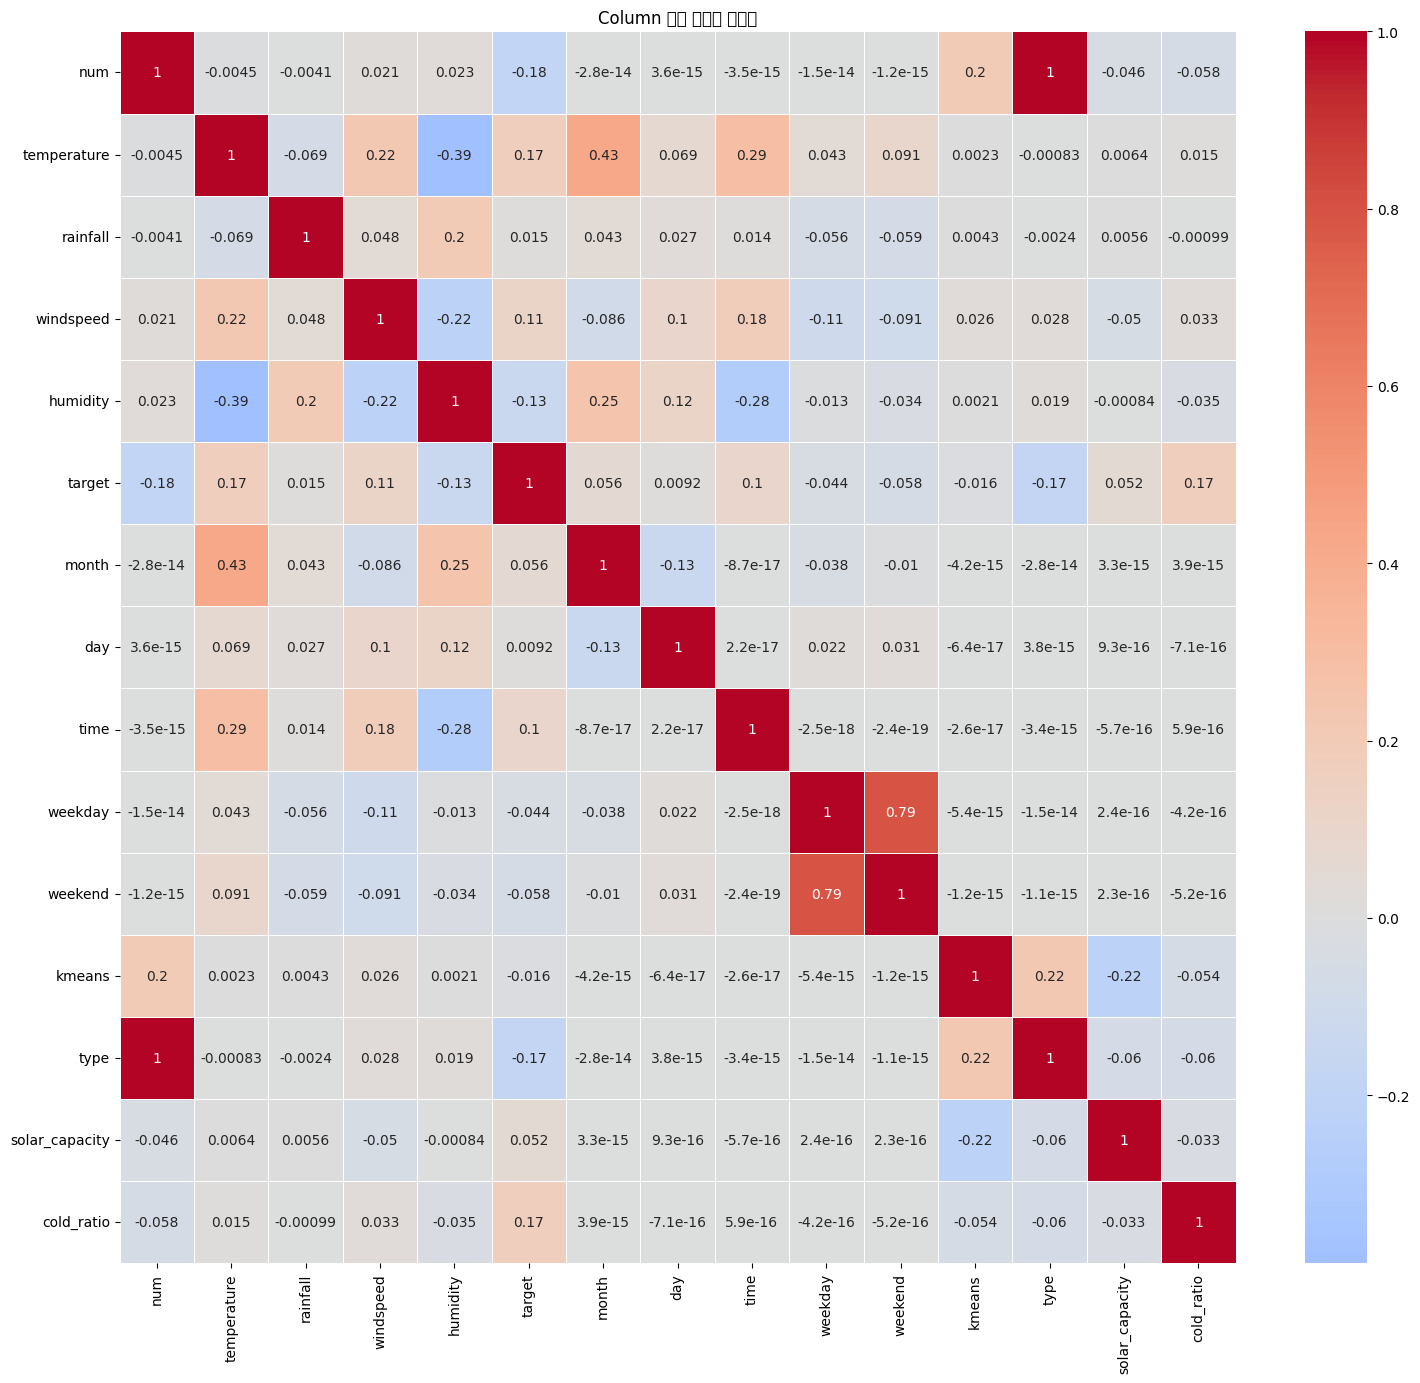

In [24]:
import seaborn as sns
import matplotlib

plt.figure(figsize = (18,16))
sns.heatmap(train_df.corr(),annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.rc('font', family='Malgun Gothic')
plt.title("Column 간의 상관성 히트맵")
plt.show()

In [25]:
train_df = train_df.drop(['type'], axis = 1)

In [26]:
cols = list(train_df.columns)
cols.remove('target')
train_df = train_df[cols + ['target']]
train_df

,num,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend,kmeans,solar_capacity,cold_ratio,target
datetime,,,,,,,,,,,,,,
2022-06-01 00:00:00,1,18.6,0.0,0.9,42.0,6,1,0,2,0,1,0.0,0.357666,1085.28
2022-06-01 01:00:00,1,18.0,0.0,1.1,45.0,6,1,1,2,0,1,0.0,0.357666,1047.36
2022-06-01 02:00:00,1,17.7,0.0,1.5,45.0,6,1,2,2,0,1,0.0,0.357666,974.88
2022-06-01 03:00:00,1,16.7,0.0,1.4,48.0,6,1,3,2,0,1,0.0,0.357666,953.76
2022-06-01 04:00:00,1,18.4,0.0,2.8,43.0,6,1,4,2,0,1,0.0,0.357666,986.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24 19:00:00,100,23.1,0.0,0.9,86.0,8,24,19,2,0,2,0.0,0.696291,881.04
2022-08-24 20:00:00,100,22.4,0.0,1.3,86.0,8,24,20,2,0,2,0.0,0.696291,798.96
2022-08-24 21:00:00,100,21.3,0.0,1.0,92.0,8,24,21,2,0,2,0.0,0.696291,825.12


In [27]:
train_frames = []
val_frames = []

for building_id in range(1,len(np.unique(train_df['num']))+1):
    building_data = train_df[train_df['num']==building_id]
    
    split_point = int(0.8 * len(building_data))
    train_frames.append(building_data.iloc[:split_point])
    val_frames.append(building_data.iloc[split_point:])

train_data = pd.concat(train_frames)
val_data = pd.concat(val_frames)

In [28]:
test_data = pd.merge(test, build, on = 'num', how = 'left')
test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data.set_index('datetime', inplace= True)
test_data = test_data.drop(['num_date_time','type'], axis = 1)
test_data

,num,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend,solar_capacity,cold_ratio
datetime,,,,,,,,,,,,
2022-08-25 00:00:00,1,23.5,0.0,2.2,72,8,25,0,3,0,0.0,0.357666
2022-08-25 01:00:00,1,23.0,0.0,0.9,72,8,25,1,3,0,0.0,0.357666
2022-08-25 02:00:00,1,22.7,0.0,1.5,75,8,25,2,3,0,0.0,0.357666
2022-08-25 03:00:00,1,22.1,0.0,1.3,78,8,25,3,3,0,0.0,0.357666
2022-08-25 04:00:00,1,21.8,0.0,1.0,77,8,25,4,3,0,0.0,0.357666
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 19:00:00,100,22.5,0.0,0.9,84,8,31,19,2,0,0.0,0.696291
2022-08-31 20:00:00,100,20.7,0.0,0.4,95,8,31,20,2,0,0.0,0.696291
2022-08-31 21:00:00,100,20.2,0.0,0.4,98,8,31,21,2,0,0.0,0.696291


In [29]:
from sklearn.preprocessing import StandardScaler

features = list(train_data.columns[:-5]) + list(train_data.columns[-3:-1])
rows_to_exclude = [9,10,13]
train_subset = np.delete(train_data, rows_to_exclude, axis=1)

scaler = StandardScaler()
scaler.fit(train_data[features])

train_data[features] = scaler.transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])
test_data[features] = scaler.transform(test_data[features])

In [30]:
train_data['target'] = np.log(train_data['target'])
val_data['target'] = np.log(val_data['target'])

c:\Users\이동현\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### LSTM

In [88]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 

from tqdm.auto import tqdm

input_size = 13  # feature의 개수
hidden_size = 64 # hidden/cell state의 크기
num_layers = 2
output_size = 1
num_epochs = 50
window_size = 24  # 예측에 사용될 시간 윈도우 크기
batch_size = 64
learning_rate = 0.001

In [32]:
train_data = train_data.drop(['kmeans'], axis = 1)
val_data = val_data.drop(['kmeans'], axis = 1)

In [33]:
train_first = train_data[:1632]
train_first = train_first.reset_index(drop=True)
train_first

,num,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend,solar_capacity,cold_ratio,target
0,-1.714816,-1.688765,-0.169753,-0.930391,-2.296041,-1.009517,-1.488922,-1.661325,-0.542141,0,-0.397768,-0.907783,6.989593
1,-1.714816,-1.839053,-0.169753,-0.782134,-2.102499,-1.009517,-1.488922,-1.516862,-0.542141,0,-0.397768,-0.907783,6.954028
2,-1.714816,-1.914197,-0.169753,-0.485621,-2.102499,-1.009517,-1.488922,-1.372399,-0.542141,0,-0.397768,-0.907783,6.882314
3,-1.714816,-2.164677,-0.169753,-0.559749,-1.908958,-1.009517,-1.488922,-1.227936,-0.542141,0,-0.397768,-0.907783,6.860412
4,-1.714816,-1.738861,-0.169753,0.478048,-2.231527,-1.009517,-1.488922,-1.083473,-0.542141,0,-0.397768,-0.907783,6.894062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,-1.714816,1.066514,-0.169753,1.515845,-0.102571,2.041467,-0.829334,1.083473,1.477890,1,-0.397768,-0.907783,8.015129
1628,-1.714816,1.016418,-0.169753,0.700433,0.026457,2.041467,-0.829334,1.227936,1.477890,1,-0.397768,-0.907783,7.881983
1629,-1.714816,0.966322,-0.169753,1.367589,0.026457,2.041467,-0.829334,1.372399,1.477890,1,-0.397768,-0.907783,7.629373
1630,-1.714816,0.891178,-0.169753,1.293460,0.219998,2.041467,-0.829334,1.516862,1.477890,1,-0.397768,-0.907783,7.345959


In [34]:
val_first = val_data[:408]
val_first = val_first.reset_index(drop=True)
val_first

,num,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend,solar_capacity,cold_ratio,target
0,-1.714816,0.765938,-0.169753,1.367589,0.478053,2.041467,-0.719403,-1.661325,-1.552156,0,-0.397768,-0.907783,7.793966
1,-1.714816,0.765938,-0.169753,1.441717,0.413539,2.041467,-0.719403,-1.516862,-1.552156,0,-0.397768,-0.907783,7.776199
2,-1.714816,0.740890,-0.169753,0.700433,0.413539,2.041467,-0.719403,-1.372399,-1.552156,0,-0.397768,-0.907783,7.719858
3,-1.714816,0.740890,-0.169753,1.145204,0.478053,2.041467,-0.719403,-1.227936,-1.552156,0,-0.397768,-0.907783,7.677864
4,-1.714816,0.715842,-0.169753,1.664102,0.413539,2.041467,-0.719403,-1.083473,-1.552156,0,-0.397768,-0.907783,7.684949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-1.714816,0.039546,-0.169753,0.552176,-0.941251,2.041467,1.039497,1.083473,-0.542141,0,-0.397768,-0.907783,7.830871
404,-1.714816,-0.085694,-0.169753,0.329791,-0.747709,2.041467,1.039497,1.227936,-0.542141,0,-0.397768,-0.907783,7.700277
405,-1.714816,-0.185886,-0.169753,-0.633878,-0.683195,2.041467,1.039497,1.372399,-0.542141,0,-0.397768,-0.907783,7.499003
406,-1.714816,-0.311126,-0.169753,-0.040851,-0.489654,2.041467,1.039497,1.516862,-0.542141,0,-0.397768,-0.907783,7.235043


In [35]:
test_1 = test_data[:168]
test_1['target'] = np.zeros(test_1.shape[0])
test_1 = test_1.reset_index(drop=True)
test_1

C:\Users\이동현\AppData\Local\Temp\ipykernel_19028\3812001117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_1['target'] = np.zeros(test_1.shape[0])


,num,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend,solar_capacity,cold_ratio,target
0,-1.714816,-0.461414,-0.169753,0.033278,-0.360626,2.041467,1.149428,-1.661325,-0.037133,0,-0.397768,-0.907783,0.0
1,-1.714816,-0.586654,-0.169753,-0.930391,-0.360626,2.041467,1.149428,-1.516862,-0.037133,0,-0.397768,-0.907783,0.0
2,-1.714816,-0.661798,-0.169753,-0.485621,-0.167085,2.041467,1.149428,-1.372399,-0.037133,0,-0.397768,-0.907783,0.0
3,-1.714816,-0.812086,-0.169753,-0.633878,0.026457,2.041467,1.149428,-1.227936,-0.037133,0,-0.397768,-0.907783,0.0
4,-1.714816,-0.887230,-0.169753,-0.856263,-0.038057,2.041467,1.149428,-1.083473,-0.037133,0,-0.397768,-0.907783,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-1.714816,-0.461414,-0.169753,-0.114979,-0.167085,2.041467,1.809015,1.083473,-0.542141,0,-0.397768,-0.907783,0.0
164,-1.714816,-0.736942,-0.169753,-0.114979,0.155484,2.041467,1.809015,1.227936,-0.542141,0,-0.397768,-0.907783,0.0
165,-1.714816,-0.912278,-0.169753,-0.411492,0.219998,2.041467,1.809015,1.372399,-0.542141,0,-0.397768,-0.907783,0.0
166,-1.714816,-1.062565,-0.169753,-0.856263,0.349026,2.041467,1.809015,1.516862,-0.542141,0,-0.397768,-0.907783,0.0


In [36]:
last_val_data = val_first.iloc[-window_size:]
test_first = pd.concat((last_val_data,test_1))
test_first = test_first.reset_index(drop = True)
test_first

,num,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend,solar_capacity,cold_ratio,target
0,-1.714816,-0.586654,-0.169753,-0.411492,-0.489654,2.041467,1.039497,-1.661325,-0.542141,0,-0.397768,-0.907783,7.744691
1,-1.714816,-0.661798,-0.169753,-0.189107,-0.231599,2.041467,1.039497,-1.516862,-0.542141,0,-0.397768,-0.907783,7.692862
2,-1.714816,-0.686846,-0.169753,-0.263236,-0.231599,2.041467,1.039497,-1.372399,-0.542141,0,-0.397768,-0.907783,7.628907
3,-1.714816,-0.661798,-0.169753,0.329791,-0.360626,2.041467,1.039497,-1.227936,-0.542141,0,-0.397768,-0.907783,7.579883
4,-1.714816,-0.711894,-0.169753,0.329791,-0.425140,2.041467,1.039497,-1.083473,-0.542141,0,-0.397768,-0.907783,7.583309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-1.714816,-0.461414,-0.169753,-0.114979,-0.167085,2.041467,1.809015,1.083473,-0.542141,0,-0.397768,-0.907783,0.000000
188,-1.714816,-0.736942,-0.169753,-0.114979,0.155484,2.041467,1.809015,1.227936,-0.542141,0,-0.397768,-0.907783,0.000000
189,-1.714816,-0.912278,-0.169753,-0.411492,0.219998,2.041467,1.809015,1.372399,-0.542141,0,-0.397768,-0.907783,0.000000
190,-1.714816,-1.062565,-0.169753,-0.856263,0.349026,2.041467,1.809015,1.516862,-0.542141,0,-0.397768,-0.907783,0.000000


In [86]:
test_first[24:-1]

,num,temperature,rainfall,windspeed,humidity,month,day,time,weekday,weekend,solar_capacity,cold_ratio,target
24,-1.714816,-0.461414,-0.169753,0.033278,-0.360626,2.041467,1.149428,-1.661325,-0.037133,0,-0.397768,-0.907783,0.0
25,-1.714816,-0.586654,-0.169753,-0.930391,-0.360626,2.041467,1.149428,-1.516862,-0.037133,0,-0.397768,-0.907783,0.0
26,-1.714816,-0.661798,-0.169753,-0.485621,-0.167085,2.041467,1.149428,-1.372399,-0.037133,0,-0.397768,-0.907783,0.0
27,-1.714816,-0.812086,-0.169753,-0.633878,0.026457,2.041467,1.149428,-1.227936,-0.037133,0,-0.397768,-0.907783,0.0
28,-1.714816,-0.887230,-0.169753,-0.856263,-0.038057,2.041467,1.149428,-1.083473,-0.037133,0,-0.397768,-0.907783,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,-1.714816,-0.135790,-0.169753,0.181535,-0.554168,2.041467,1.809015,0.939010,-0.542141,0,-0.397768,-0.907783,0.0
187,-1.714816,-0.461414,-0.169753,-0.114979,-0.167085,2.041467,1.809015,1.083473,-0.542141,0,-0.397768,-0.907783,0.0
188,-1.714816,-0.736942,-0.169753,-0.114979,0.155484,2.041467,1.809015,1.227936,-0.542141,0,-0.397768,-0.907783,0.0
189,-1.714816,-0.912278,-0.169753,-0.411492,0.219998,2.041467,1.809015,1.372399,-0.542141,0,-0.397768,-0.907783,0.0


In [78]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df, window_size):
        self.df = df.values
        self.window_size = window_size

    def __len__(self):
        return len(self.df) - self.window_size # 마지막에는 window_size 만큼의 라벨이 없음

    def __getitem__(self, idx):
        x = torch.tensor(self.df[idx:idx+self.window_size], dtype=torch.float)
        if self.df.shape[1] > 1:
            y = torch.tensor(self.df[idx+self.window_size, -1], dtype=torch.float) # window_size 다음 시점의 마지막 특성 값(target)
        else:
            y = None
        return x, y


def create_data_loader(df, window_size, batch_size):
    # 데이터 로더는 배치 학습을 위해 데이터를 여러 배치로 나누어 주며, 각 배치에는 batch_size만큼의 데이터 포인트가 포함
    dataset = TimeSeriesDataset(df, window_size)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return data_loader

In [79]:
train_loader = create_data_loader(train_first, window_size, batch_size)
val_loader = create_data_loader(val_first, window_size, batch_size)

In [80]:
test_dataset = TimeSeriesDataset(test_first, window_size)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [89]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size) # LSTM의 마지막 hidden state를 받아서 fc net을 통해 output_size로 변환

    def forward(self, x): # propagation 정의
        # 초기 hidden state와 cell state를 0으로 설정, 크기는 (LSTM 레이어 수, 배치 크기, hidden state의 크기)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0)) # (batch_size, sequence_length, input_size)를 입력으로 받고, (batch_size, sequence_length, hidden_size)룰 츌력
        out = self.fc(out[:, -1, :]) # 모든 배치에서 마지막 타임스텝의 출력만을 선택(그 다음날의 예측을 위함)
        return out

In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current device: {device}")

current device: cpu


In [92]:
# 모델, 손실 함수, 최적화 알고리즘 초기화

def smape_loss(predicted, actual):
    epsilon = 1e-10
    diff = torch.abs(predicted - actual)
    denom = (torch.abs(predicted) + torch.abs(actual)) / 2.0
    return (100.0 * diff / (denom + epsilon)).mean()


base_model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)
optimizer = torch.optim.Adam(base_model.parameters(), lr=learning_rate)

# 모델 훈련
for epoch in range(num_epochs):
    base_model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.unsqueeze(1).to(device) # 모델의 출력과 손실 함수가 2차원 Tensor를 요구하기 때문에, 출력과 레이블의 차원을 일치시키기위해 (batch_size,1)로 변경
        
        outputs = base_model(inputs)
        loss = smape_loss(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # 검증 데이터로 성능 평가
    base_model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.unsqueeze(1).to(device)
            outputs = base_model(inputs)
            loss = smape_loss(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

Epoch 1/50, Loss: 65.5748, Val Loss: 65.2267
Epoch 2/50, Loss: 17.4834, Val Loss: 17.0375
Epoch 3/50, Loss: 4.0477, Val Loss: 4.0135
Epoch 4/50, Loss: 4.1220, Val Loss: 3.9576
Epoch 5/50, Loss: 4.2668, Val Loss: 4.0161
Epoch 6/50, Loss: 4.1605, Val Loss: 3.9665
Epoch 7/50, Loss: 4.1598, Val Loss: 3.9662
Epoch 8/50, Loss: 4.1630, Val Loss: 3.9672
Epoch 9/50, Loss: 4.1571, Val Loss: 3.9651
Epoch 10/50, Loss: 4.1554, Val Loss: 3.9644
Epoch 11/50, Loss: 4.1558, Val Loss: 3.9644
Epoch 12/50, Loss: 4.1611, Val Loss: 3.9661
Epoch 13/50, Loss: 4.1461, Val Loss: 3.9610
Epoch 14/50, Loss: 4.1538, Val Loss: 3.9634
Epoch 15/50, Loss: 4.1464, Val Loss: 3.9608
Epoch 16/50, Loss: 4.1567, Val Loss: 3.9641
Epoch 17/50, Loss: 4.1350, Val Loss: 3.9578
Epoch 18/50, Loss: 4.1542, Val Loss: 3.9629
Epoch 19/50, Loss: 4.1343, Val Loss: 3.9572
Epoch 20/50, Loss: 4.1498, Val Loss: 3.9610
Epoch 21/50, Loss: 4.1396, Val Loss: 3.9576
Epoch 22/50, Loss: 4.1385, Val Loss: 3.9569
Epoch 23/50, Loss: 4.1326, Val Loss: 

In [95]:
base_model.eval()

base_test_predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        # 모델을 통한 예측
        outputs = base_model(inputs)
        
        # 예측 결과 저장
        base_test_predictions.extend(outputs.detach().cpu().numpy().flatten().tolist())

### Develop LSTM

In [105]:
import torch.nn as nn
import torch.nn.functional as F

class EnhancedLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_prob=0.3):
        super(EnhancedLSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # 1. LSTM 레이어 추가 (이미 num_layers를 통해 추가 가능)
        # 2. Dropout 추가
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True, dropout=dropout_prob)

        # 3. Fully Connected Layer 추가
        # 중간의 Dense 레이어의 크기를 2배로 설정했으나, 이는 실험적으로 변경 가능
        self.fc1 = nn.Linear(hidden_size, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        # 5. Batch Normalization
        # 각 레이어의 입력을 정규화하여 평균이 0이고 분산이 1이 되도록 함
        self.bn = nn.BatchNorm1d(hidden_size * 2) 

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        
        # LSTM의 마지막 시간 단계의 출력 사용
        out = out[:, -1, :]

        # 4. 활성화 함수 변경 (ReLU 사용)
        out = F.relu(self.fc1(out))
        
        # Batch Normalization 적용
        out = self.bn(out)
        
        out = F.relu(self.fc2(out))
        out = self.fc3(out)

        return out

In [104]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, is_maximize=False):
        self.patience = patience
        self.delta = delta
        self.is_maximize = is_maximize
        self.best_score = None
        self.counter = 0

    def __call__(self, score):
        if self.best_score is None:
            self.best_score = score
        elif ((self.is_maximize and score < self.best_score + self.delta) or
            (not self.is_maximize and score > self.best_score - self.delta)):
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                return True
        else:
            self.best_score = score
            self.counter = 0
        return False

In [108]:
from torch.optim.lr_scheduler import StepLR

model = EnhancedLSTM(input_size, hidden_size, num_layers, output_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=100, gamma=0.9)
early_stopping = EarlyStopping(patience=10, delta=0.001, is_maximize=False)

# 모델 훈련
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.unsqueeze(1).to(device)
        
        outputs = model(inputs)
        loss = smape_loss(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # 검증 데이터로 성능 평가
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.unsqueeze(1).to(device)
            outputs = model(inputs)
            loss = smape_loss(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')
    
    scheduler.step()
    
    if early_stopping(val_loss):
        print("Early stopping")
        break


Epoch 1/50, Loss: 180.8439, Val Loss: 176.6458
Epoch 2/50, Loss: 36.2926, Val Loss: 33.5497
Epoch 3/50, Loss: 9.9254, Val Loss: 9.8964
Epoch 4/50, Loss: 8.2913, Val Loss: 7.4799
Epoch 5/50, Loss: 13.8325, Val Loss: 12.8465
EarlyStopping counter: 1 out of 10
Epoch 6/50, Loss: 8.1479, Val Loss: 6.8023
Epoch 7/50, Loss: 7.6456, Val Loss: 6.0023
Epoch 8/50, Loss: 8.1852, Val Loss: 6.7223
EarlyStopping counter: 1 out of 10
Epoch 9/50, Loss: 6.6094, Val Loss: 4.8839
Epoch 10/50, Loss: 9.0601, Val Loss: 7.4950
EarlyStopping counter: 1 out of 10
Epoch 11/50, Loss: 10.8872, Val Loss: 10.5848
EarlyStopping counter: 2 out of 10
Epoch 12/50, Loss: 6.1535, Val Loss: 6.0370
EarlyStopping counter: 3 out of 10
Epoch 13/50, Loss: 4.2211, Val Loss: 4.1267
Epoch 14/50, Loss: 2.8478, Val Loss: 2.6720
Epoch 15/50, Loss: 3.2962, Val Loss: 3.5692
EarlyStopping counter: 1 out of 10
Epoch 16/50, Loss: 4.0598, Val Loss: 4.1843
EarlyStopping counter: 2 out of 10
Epoch 17/50, Loss: 18.8575, Val Loss: 15.7698
Earl

In [109]:
model.eval()

enhance_test_predictions = []

with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        # 모델을 통한 예측
        outputs = model(inputs)
        
        # 예측 결과 저장
        enhance_test_predictions.extend(outputs.detach().cpu().numpy().flatten().tolist())


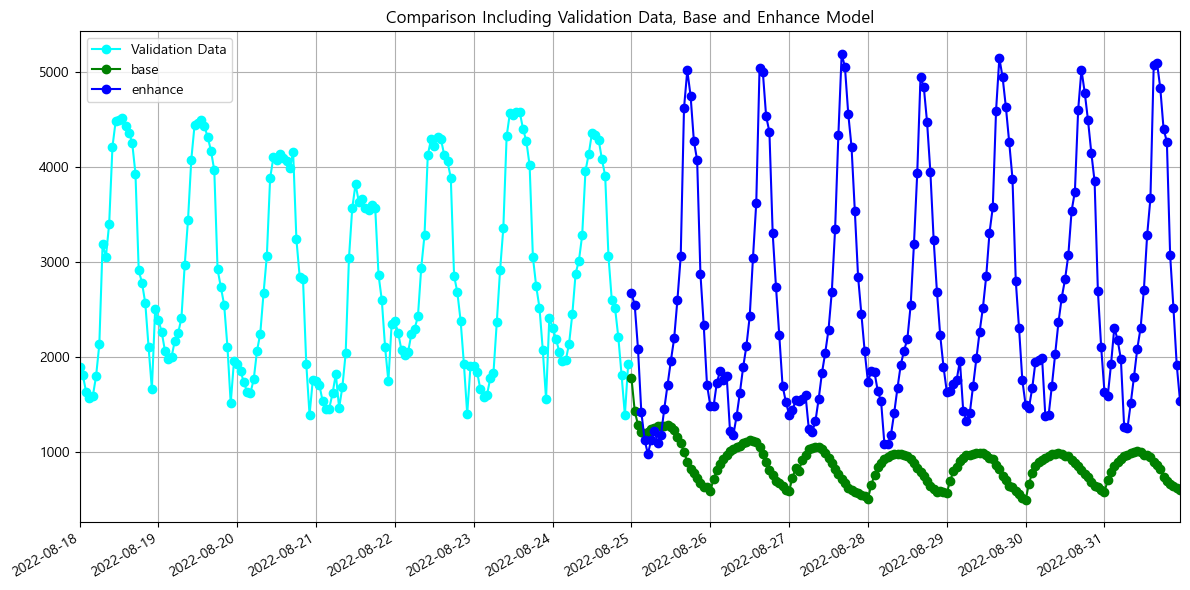

In [184]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# 날짜 범위 설정
dates = pd.date_range('2022-08-25', periods=168, freq='H')

# 로그화 해제(지수함수)
base_predictions =list(np.exp(base_test_predictions))
enhance_predictions =list(np.exp(enhance_test_predictions))

val_dates = pd.date_range('2022-08-18', periods=168, freq='H')
val_values = np.exp(val_data[240:408]['target'].values) 

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 검증 데이터 그리기
ax.plot(val_dates, val_values, label='Validation Data', marker='o', color='cyan')

# 모델 예측값 그리기
ax.plot(dates, base_predictions, label='base', marker='o', color='green')
ax.plot(dates, enhance_predictions, label='enhance', marker='o', color='blue')

# x축 눈금 설정
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # 매일을 주요 눈금으로 설정
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

start_date = val_dates[0]
end_date = dates[-1]
ax.set_xlim([start_date, end_date])
fig.autofmt_xdate()
ax.legend()

plt.title("Comparison Including Validation Data, Base and Enhance Model")
plt.grid(True)
plt.tight_layout()
plt.show()
